In [19]:
import os
from data import Dataset, make_dataset
from models import fit_model
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from data import Dataset

In [8]:
dataset = make_dataset('../data/resized')
dataset

Dataset<size=148>

In [28]:
model, pca = fit_model(dataset, 50)

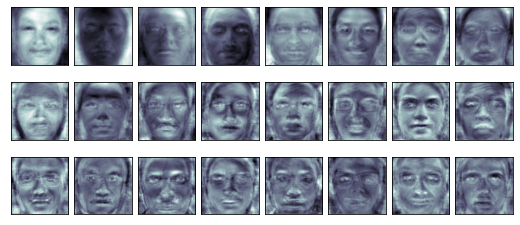

In [29]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(300, 300), cmap='bone')

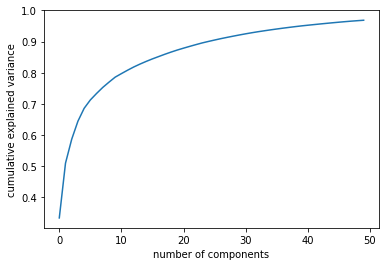

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [27]:
np.cumsum(pca.explained_variance_ratio_)[:-10]

array([0.33453143, 0.51012202, 0.58688056, 0.64462359, 0.68590475,
       0.71279627, 0.73357495, 0.75295521, 0.76982257, 0.78591466,
       0.79720856, 0.80818917, 0.81858288, 0.82784622, 0.8364449 ,
       0.84447848, 0.85192087, 0.85933008, 0.86628554, 0.87283999,
       0.87881396, 0.88457955, 0.89018712, 0.89557549, 0.90031039,
       0.90485754, 0.90927128, 0.91336437, 0.91731555, 0.92114511,
       0.92481401, 0.92825555, 0.93152239, 0.93453272, 0.93745794,
       0.94021525, 0.94290469, 0.94544361, 0.94790447, 0.95022428,
       0.95233456, 0.95437561, 0.95640116, 0.95832939, 0.96022474,
       0.9620461 , 0.96379241, 0.96544217, 0.96690657, 0.96835796])

In [34]:
components = pca.transform(dataset.get_flatten_images())
projected = pca.inverse_transform(components)


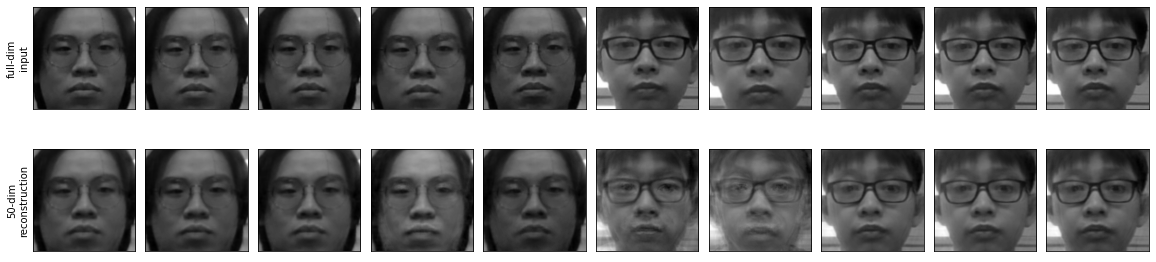

In [39]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(20, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
org = dataset.get_images()
for i in range(10):
    ax[0, i].imshow(org[i].reshape(300, 300), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(300, 300), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('50-dim\nreconstruction');